In [1]:
# Install a pip package in the current Jupyter kernel
!python --version
import sys
!{sys.executable} -m pip install numpy pandas matplotlib

Python 3.11.9


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

dir = '/Users/lord_pretzel/Documents/Publications/2021_Murali-ProvenanceFiltering-With-Chase/prov_semanticopt_experiment'
os.chdir(dir)

In [3]:
def resultdir(resultsize, dbsize, index):
    return f"results_N{resultsize}_D{dbsize}_I{index}"

def calculate_mean(q, method,table, resultsize, dbsize, index):
    global resultdirs
    resdir = resultdir(resultsize, dbsize, index)
    #url = f'https://raw.githubusercontent.com/lordpretzel/prov_semanticopt_experiment/master/{resdir}/runtime_{q}_{table}_{method}.csv'
    url = f"./{resdir}/runtime_{q}_{table}_{method}.csv"
    df = pd.read_csv(url, header=None, delimiter=',')
    df = df.set_axis(["time"], axis=1)
    return df['time'].mean()

allmethods = ['flatten', 'unopt', 'unoptheu', 'opt', 'optnoflat', 'optheu']
allqueries = ['01','02','03', '04', '05', '06', '07', '08', '09','10','11', '14', '17', '19', '20'] # ,'02','03']
resultsizes = [ '1', '10p', '25p', '100p' ] #, '10p', '25p', '100p' ]
dbsizes = [ '1GB','10GB' ]    
index = [ 'noindex', 'index' ]
# resultdirs = { x: "results_n1" for x in  ['flatten', 'unopt', 'opt', 'optnoflat'] }
# resultdirs |= { x: "testopt_results" for x in ['unoptheu', 'optheu'] }

optlabel = 'ProvSO'
nonoptlabel = 'ProvSO-noopt'
colors = { 
    optlabel: 'orange',
    nonoptlabel: 'black'
}

queries = {
    "01": ["lineitem"],
    "02": ["nation", "part", "partsupp", "region"],
    "03": ["customer", "lineitem", "orders"],
    "04": ["lineitem"], #"orders"],
    "05": ["customer", "lineitem", "nation", "orders", "region"],
    "06": ["lineitem"],
    "07": ["customer", "lineitem", "nation", "orders", "supplier"],
    "08": ["customer", "nation", "part", "supplier"],
    "09": ["lineitem", "nation", "orders", "part", "partsupp", "supplier"],
    "10": ["customer", "lineitem", "nation", "orders"],
    "11": ["nation", "partsupp", "supplier"],
    "12": ["lineitem", "orders"],
    "13": ["customer", "orders"],
    "14": ["lineitem", "part"],
    "15": ["lineitem", "supplier"],
    "16": ["part", "partsupp", "supplier"],
    "17": ["lineitem", "part"],
    "18": ["customer", "lineitem", "orders"],
    "19": ["lineitem", "part"],
    "20": ["part"],
    }

In [4]:
allresult = {}
for d in dbsizes:
    allresult[d] = {}
    for i in index:
        allresult[d][i] = {}
        for n in resultsizes:
            allresult[d][i][n] = {}
            for q in allqueries: #['01','02', ...
                allresult[d][i][n][q] = {} #has to exist before assigning sub-whatever
                for table in queries[q]: #[part,region, ...]
                    resultsforq = {}
                    for method in allmethods: # ['flatten', 'unopt', 'opt'] 
                        try:
                            mean = calculate_mean(q,method,table,n,d,i)
                            resultsforq[method] = mean
                            #print(resultsforq)
                        except Exception as e:
                            print(f"ERROR DB: {d} [{i}] with numresults {n} for {q} for {table} using {method}: {e}")
                #print(allresult)
                    allresult[d][i][n][q][table] = resultsforq
allresult 

ERROR DB: 1GB [noindex] with numresults 25p for 01 for lineitem using flatten: [Errno 2] No such file or directory: './results_N25p_D1GB_Inoindex/runtime_01_lineitem_flatten.csv'
ERROR DB: 1GB [noindex] with numresults 25p for 01 for lineitem using unopt: [Errno 2] No such file or directory: './results_N25p_D1GB_Inoindex/runtime_01_lineitem_unopt.csv'
ERROR DB: 1GB [noindex] with numresults 25p for 01 for lineitem using unoptheu: [Errno 2] No such file or directory: './results_N25p_D1GB_Inoindex/runtime_01_lineitem_unoptheu.csv'
ERROR DB: 1GB [noindex] with numresults 25p for 01 for lineitem using opt: [Errno 2] No such file or directory: './results_N25p_D1GB_Inoindex/runtime_01_lineitem_opt.csv'
ERROR DB: 1GB [noindex] with numresults 25p for 01 for lineitem using optnoflat: [Errno 2] No such file or directory: './results_N25p_D1GB_Inoindex/runtime_01_lineitem_optnoflat.csv'
ERROR DB: 1GB [noindex] with numresults 25p for 01 for lineitem using optheu: [Errno 2] No such file or directo

{'1GB': {'noindex': {'1': {'01': {'lineitem': {'flatten': 11352.01775,
      'unopt': 11461.818750000002,
      'unoptheu': 11373.1852,
      'opt': 11355.10235,
      'optnoflat': 11430.63765,
      'optheu': 11358.355599999999}},
    '02': {'nation': {'flatten': 55799.61665,
      'unopt': 50.76865,
      'unoptheu': 50.2324,
      'opt': 38.6127,
      'optnoflat': 46.827600000000004,
      'optheu': nan},
     'part': {'flatten': 54038.73270000001,
      'unopt': 50.91275,
      'unoptheu': 50.51755,
      'opt': 9.03755,
      'optnoflat': 44.97675,
      'optheu': nan},
     'partsupp': {'flatten': 55358.3861,
      'unopt': 51.0044,
      'unoptheu': 52.15820000000001,
      'opt': 38.785700000000006,
      'optnoflat': 48.19715,
      'optheu': nan},
     'region': {'flatten': 42316.59560000001,
      'unopt': 51.538,
      'unoptheu': 52.312149999999995,
      'opt': 38.497499999999995,
      'optnoflat': 48.45805,
      'optheu': nan}},
    '03': {'customer': {'flatten': 4.99

In [5]:
def dfs_for_experiments(results, methods):
    edfs = {}
    for q in allqueries:
        qdata = results[q]
        qdict = { k: [] for k in usemethods } # allmethods }
        tables = qdata.keys()
        for t in qdata:
            for m in usemethods:
                val = qdata[t][m] if m in qdata[t] else np.nan
                val = val if val > 0.9 else np.nan
                qdict[m] = qdict[m] + [val]
        edfs[q] = pd.DataFrame(data=qdict, index=tables)
        edfs[q] = round(edfs[q],2)
    return edfs
    
dfs = {}
usemethods=allmethods

for d in dbsizes:
    dfs[d] = {}
    for i in index:
        dfs[d][i] = {}
        for n in resultsizes:
            dfs[d][i][n] = {}
            dfs[d][i][n] = dfs_for_experiments(allresult[d][i][n], usemethods)

dfs

{'1GB': {'noindex': {'1': {'01':            flatten     unopt  unoptheu      opt  optnoflat    optheu
    lineitem  11352.02  11461.82  11373.19  11355.1   11430.64  11358.36,
    '02':            flatten  unopt  unoptheu    opt  optnoflat  optheu
    nation    55799.62  50.77     50.23  38.61      46.83     NaN
    part      54038.73  50.91     50.52   9.04      44.98     NaN
    partsupp  55358.39  51.00     52.16  38.79      48.20     NaN
    region    42316.60  51.54     52.31  38.50      48.46     NaN,
    '03':           flatten  unopt  unoptheu   opt  optnoflat  optheu
    customer     4.99   5.22      4.76  4.07       4.36    4.03
    lineitem     4.99   5.15      4.87  3.13       3.32    3.12
    orders       4.94   5.09      4.69  3.03       3.28    3.03,
    '04':           flatten    unopt  unoptheu     opt  optnoflat  optheu
    lineitem   440.17  3448.25    440.52  441.07    3463.88  442.21,
    '05':           flatten   unopt  unoptheu     opt  optnoflat  optheu
    cust

In [20]:
dfs['1GB']['noindex']['1']

{'01':            flatten     unopt  unoptheu      opt  optnoflat    optheu
 lineitem  11352.02  11461.82  11373.19  11355.1   11430.64  11358.36,
 '02':            flatten  unopt  unoptheu    opt  optnoflat  optheu
 nation    55799.62  50.77     50.23  38.61      46.83     NaN
 part      54038.73  50.91     50.52   9.04      44.98     NaN
 partsupp  55358.39  51.00     52.16  38.79      48.20     NaN
 region    42316.60  51.54     52.31  38.50      48.46     NaN,
 '03':           flatten  unopt  unoptheu   opt  optnoflat  optheu
 customer     4.99   5.22      4.76  4.07       4.36    4.03
 lineitem     4.99   5.15      4.87  3.13       3.32    3.12
 orders       4.94   5.09      4.69  3.03       3.28    3.03,
 '04':           flatten    unopt  unoptheu     opt  optnoflat  optheu
 lineitem   440.17  3448.25    440.52  441.07    3463.88  442.21,
 '05':           flatten   unopt  unoptheu     opt  optnoflat  optheu
 customer   231.03  271.92    233.62  232.10     271.59  235.68
 lineitem

In [7]:
def best_opt_noopt_for_experiemnt(edfs):
    ebestdfs = {}
    for q in allqueries:
        df = edfs[q].copy()
        df = df.fillna(1000000.0)        
        df[nonoptlabel] = df[['flatten','unopt','unoptheu']].min(axis=1)
        df[optlabel] = df[['opt','optnoflat','optheu']].min(axis=1) 
        df = df.drop(columns=['opt','optnoflat','flatten','unopt'])
        cols = [nonoptlabel, optlabel]
        df = df[cols]
        ebestdfs[q] = df
    return ebestdfs

def create_rel_best_df(bestdf):
    relbest = {}
    for q in allqueries:
        rel = bestdf[q].copy()
        rel[optlabel] = rel[optlabel] / rel[nonoptlabel]  
        rel = rel.drop([nonoptlabel], axis=1)
        relbest[q] = rel

    return relbest

bestdfs = {}
relbestdfs = {}
for d in dbsizes:
    bestdfs[d] = {}
    relbestdfs[d] = {}
    for i in index:
        bestdfs[d][i] = {}
        relbestdfs[d][i] = {}
        for n in resultsizes:
            bestdfs[d][i][n] = {}
            bestdfs[d][i][n] = best_opt_noopt_for_experiemnt(dfs[d][i][n])
            relbestdfs[d][i][n] = create_rel_best_df(bestdfs[d][i][n])

bestdfs
relbestdfs

{'1GB': {'noindex': {'1': {'01':             ProvSO
    lineitem  1.000271,
    '02':             ProvSO
    nation    0.768664
    part      0.178939
    partsupp  0.760588
    region    0.746993,
    '03':             ProvSO
    customer  0.846639
    lineitem  0.640657
    orders    0.646055,
    '04':             ProvSO
    lineitem  1.002045,
    '05':             ProvSO
    customer  1.004631
    lineitem  1.010309
    nation    1.005790
    orders    0.998110
    region    0.997186,
    '06':             ProvSO
    lineitem  1.001256,
    '07':             ProvSO
    customer  0.886042
    lineitem  0.873642
    nation    1.861208
    orders    0.916411
    supplier  0.919260,
    '08':             ProvSO
    customer  2.193041
    nation    1.001393
    part      2.154636
    supplier  2.144530,
    '09':             ProvSO
    lineitem  1.274735
    nation    1.460071
    orders    1.278891
    part      1.264756
    partsupp  1.273300
    supplier  1.272523,
    '10':        

In [8]:
bestdfs['1GB']['noindex']['1']
relbestdfs['1GB']['noindex']['1']

{'01':             ProvSO
 lineitem  1.000271,
 '02':             ProvSO
 nation    0.768664
 part      0.178939
 partsupp  0.760588
 region    0.746993,
 '03':             ProvSO
 customer  0.846639
 lineitem  0.640657
 orders    0.646055,
 '04':             ProvSO
 lineitem  1.002045,
 '05':             ProvSO
 customer  1.004631
 lineitem  1.010309
 nation    1.005790
 orders    0.998110
 region    0.997186,
 '06':             ProvSO
 lineitem  1.001256,
 '07':             ProvSO
 customer  0.886042
 lineitem  0.873642
 nation    1.861208
 orders    0.916411
 supplier  0.919260,
 '08':             ProvSO
 customer  2.193041
 nation    1.001393
 part      2.154636
 supplier  2.144530,
 '09':             ProvSO
 lineitem  1.274735
 nation    1.460071
 orders    1.278891
 part      1.264756
 partsupp  1.273300
 supplier  1.272523,
 '10':             ProvSO
 customer  0.026960
 lineitem  0.994625
 nation    0.030116
 orders    0.986021,
 '11':             ProvSO
 nation    1.005460
 par

# All data together and compute stats

In [9]:
# ignoring q7 for now
#TODO needs to be fixed
merged_dfs = {}
relative_avgs = {}
relative_dfs = {}
total_dfs = {}
for d in dbsizes:
    relative_avgs[d] = {}
    total_dfs[d] = {}
    relative_dfs[d] = {}
    for i in index:
        relative_avgs[d][i] = {}
        total_dfs[d][i] = {}
        relative_dfs[d][i] = {}
        for n in resultsizes:
            relative_avgs[d][i][n] = {}
            print(f"db {d} index: {i}: resultsize: {n}")
            ddfs = dfs[d][i][n]
            merged_df = pd.concat([ ddfs[q] for q in ddfs.keys() if q not in ['q07']])
            merged_df[nonoptlabel] = merged_df[['flatten','unopt','unoptheu']].min(axis=1)
            merged_df[optlabel] = merged_df[['opt','optnoflat','optheu','flatten','unopt','unoptheu']].min(axis=1) 
            merged_dfs[d] = merged_df
            
            total_df = merged_df[[nonoptlabel,optlabel]].sum()
            relative = merged_df.copy()
            relative['min'] = relative.min(axis=1)
            for c in merged_df.columns:
                relative[c] = relative[c] / relative['min']

            total_dfs[d][i][n] = total_df
            relative_avg = relative.mean()    
            relative_avgs[d][i][n] = relative_avg            
            relative_dfs[d][i][n] = relative
            #print(total_df)
            print(total_df)

db 1GB index: noindex: resultsize: 1
ProvSO-noopt    76165.14
ProvSO          72526.13
dtype: float64
db 1GB index: noindex: resultsize: 10p
ProvSO-noopt    108928.77
ProvSO          100159.48
dtype: float64
db 1GB index: noindex: resultsize: 25p
ProvSO-noopt    0.0
ProvSO          0.0
dtype: float64
db 1GB index: noindex: resultsize: 100p
ProvSO-noopt    0.0
ProvSO          0.0
dtype: float64
db 1GB index: index: resultsize: 1
ProvSO-noopt    54532.20
ProvSO          54353.33
dtype: float64
db 1GB index: index: resultsize: 10p
ProvSO-noopt    95708.23
ProvSO          93174.40
dtype: float64
db 1GB index: index: resultsize: 25p
ProvSO-noopt    98038.71
ProvSO          95440.87
dtype: float64
db 1GB index: index: resultsize: 100p
ProvSO-noopt    97684.28
ProvSO          95122.68
dtype: float64
db 10GB index: noindex: resultsize: 1
ProvSO-noopt    628250.82
ProvSO          596123.30
dtype: float64
db 10GB index: noindex: resultsize: 10p
ProvSO-noopt    121341.22
ProvSO          121341.22

In [10]:
need_avgs = {}
need_avgs['1GB-index'] = relative_avgs['1GB']['index']['1']
need_avgs['1GB-noindex'] = relative_avgs['1GB']['noindex']['1']
need_avgs['10GB-index'] =relative_avgs['10GB']['index']['1']
need_avgs['10GB-noindex'] =relative_avgs['10GB']['noindex']['1']
need_avgs

{'1GB-index': flatten            5.304555
 unopt              1.730408
 unoptheu           1.294426
 opt                2.995287
 optnoflat          1.894223
 optheu             1.231648
 ProvSO-noopt       1.218104
 ProvSO             1.000000
 min             1235.302955
 dtype: float64,
 '1GB-noindex': flatten          228.902414
 unopt              3.370458
 unoptheu          75.537266
 opt                1.439119
 optnoflat          6.813304
 optheu             1.054956
 ProvSO-noopt       2.776994
 ProvSO             1.000000
 min             1648.321136
 dtype: float64,
 '10GB-index': flatten            48.433517
 unopt               2.769456
 unoptheu            2.302373
 opt                 7.827376
 optnoflat           2.283724
 optheu              9.233671
 ProvSO-noopt        2.426056
 ProvSO              1.000000
 min             17279.752750
 dtype: float64,
 '10GB-noindex': flatten          4085.939229
 unopt              21.716618
 unoptheu           27.732123
 opt     

In [11]:
need_totals = {}
need_totals['1GB-index'] = total_dfs['1GB']['index']['1']
need_totals['1GB-noindex'] = total_dfs['1GB']['noindex']['1']
need_totals['10GB-index'] =total_dfs['10GB']['index']['1']
need_totals['10GB-noindex'] =total_dfs['10GB']['noindex']['1']
need_totals

totals_overview_cols = []
totals_overview_series = []
for d in dbsizes:
    for i in index:
        for n in resultsizes:  
            df = total_dfs[d][i][n]
            if df.iloc[0] > 0.0:
                totals_overview_cols.append(f'{d}-{i}-{n}')
                totals_overview_series.append(total_dfs[d][i][n])
                

totals_overview_df = pd.concat(totals_overview_series, axis=1)
totals_overview_df.columns = totals_overview_cols
totals_overview_df
totals_transposed_df = totals_overview_df.T
totals_transposed_df['difference'] = round((totals_transposed_df[nonoptlabel] - totals_transposed_df[optlabel]) / totals_transposed_df[nonoptlabel], 2) * 100
totals_transposed_df

latex_code = totals_transposed_df.to_latex(float_format="{:,.1f}".format)
print(latex_code)

\begin{tabular}{lrrr}
\toprule
 & ProvSO-noopt & ProvSO & difference \\
\midrule
1GB-noindex-1 & 76,165.1 & 72,526.1 & 5.0 \\
1GB-noindex-10p & 108,928.8 & 100,159.5 & 8.0 \\
1GB-index-1 & 54,532.2 & 54,353.3 & 0.0 \\
1GB-index-10p & 95,708.2 & 93,174.4 & 3.0 \\
1GB-index-25p & 98,038.7 & 95,440.9 & 3.0 \\
1GB-index-100p & 97,684.3 & 95,122.7 & 3.0 \\
10GB-noindex-1 & 628,250.8 & 596,123.3 & 5.0 \\
10GB-noindex-10p & 121,341.2 & 121,341.2 & 0.0 \\
10GB-index-1 & 732,754.4 & 691,190.1 & 6.0 \\
10GB-index-10p & 736,837.0 & 702,634.1 & 5.0 \\
\bottomrule
\end{tabular}



# plotting
## plotting functions

In [12]:
short_table_names = {
    'customer': 'cust',
    'lineitem': 'lineit',
    'part': 'part',
    'nation': 'nation',
    'region': 'region',
    'supplier': 'supp',
    'partsupp': 'ps',
    'orders': 'orders'
}

def shorten_table_names(tables):
    return [ short_table_names[t] for t in tables ]

In [13]:
def plotquery(q, df, ax, show=False, title=False, barlabels=False, isrel=False):
    tables = list(df.index)
    series = df.columns.to_list()
    numbars = len(series)
    iseven = (numbars / 2).is_integer()
    x = np.arange(len(tables))  # the label locations
    width = 0.8 # if numbars <= 2 else 0.3 # the width of the bars
    axis_label_font = {'fontsize': 16}
    ticksfont = {'fontsize': 14}
    
    if max([ max(df[s]) for s in series]) > 800:
        unit = '(sec)'
    else:
        unit = '(msec)'

    rects = {}
    for i, m in enumerate(series):
        if numbars == 1:
            xpos = x
        else: 
            step = width / (2 * math.floor(numbars / 2))
            xpos = x - width/2 + (step * i)

        if m in colors:
            rects[m] = ax.bar(x = xpos,
                            height = df[m] / (1000 if unit=='(sec)' else 1), 
                            width = width/numbars, 
                            label = m,
                            align = 'edge' if iseven else 'center',
                            color = colors[m])
        else:
            rects[m] = ax.bar(x = xpos,
                            height = df[m] / (1000 if unit=='(sec)' else 1), 
                            width = width/numbars, 
                            label = m,
                            align = 'edge' if iseven else 'center')
 
        if barlabels:
            ax.bar_label(rects[m], padding=3)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ylabel = 'Relative Runtime' if isrel else 'Runtime ' + unit
    ax.set_ylabel(ylabel, fontdict=axis_label_font)
    if title:
        ax.set_title('Capture Runtime ' + q, fontdict=axis_label_font)
    ax.set_xticks(x, shorten_table_names(tables), fontdict=ticksfont)
    ax.legend()
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(ax.get_yticklabels(),fontdict=ticksfont) 
    if show:
        plt.show()

In [14]:
def experiment_overview_plot(d,i,n,edfs,isbest,isrel=False):
    x, y = 4,4
    scale = 6
    plotfile = f'overviewplot_D{d}_N{n}_I{i}_{"best_for_opt_and_unopt" if isbest else "allmethods"}.pdf'
    plt.rcParams["figure.figsize"] = [scale * x, scale * y]
    fig, axs = plt.subplots(y,x)
    axs = [ item for a in axs for item in a ]
    for qpos, q in enumerate(allqueries):
        plotquery(q, edfs[q], axs[qpos], show=False, title=True, barlabels=False, isrel=isrel)
    if os.path.exists(plotfile):
        os.remove(plotfile)
    plt.savefig(plotfile, format='pdf')
    plt.close()

In [15]:
def experiment_one_query_plot(d,i,n,q,edfs,isbest,show=False):
    scale = 6   
    plotfile = f'Q{q}_D{d}_N{n}_I{i}_{"best_for_opt_and_unopt" if isbest else "allmethods"}.pdf'
    plt.rcParams["figure.figsize"] = [scale, scale ]
    fig, axs = plt.subplots()
    plotquery(q, edfs[q], axs)
    if show:
        plt.show()
        plt.close()
    else:
        if os.path.exists(plotfile):
            os.remove(plotfile)
        plt.savefig(plotfile, format='pdf')
        plt.close()

def experiment_per_query_plot(d,i,n,edfs,isbest):
    for qpos, q in enumerate(allqueries):
        experiment_one_query_plot(d,i,n,q,edfs,isbest)


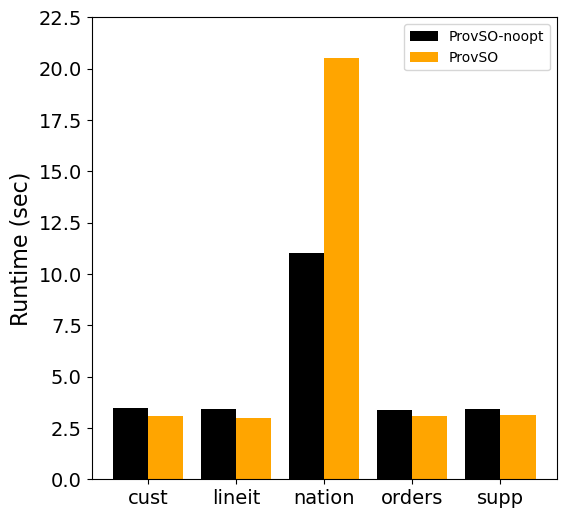

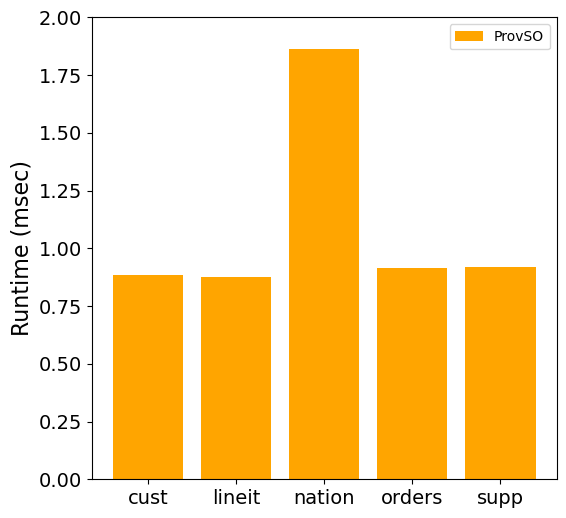

In [19]:
experiment_one_query_plot('1GB', 'noindex', '1', '07', bestdfs['1GB']['noindex']['1'], True, True)
experiment_one_query_plot('1GB', 'noindex', '1', '07', relbestdfs['1GB']['noindex']['1'], True, True)

## creating plots

In [272]:
os.chdir(dir + "/qplot/")
    
for d in dbsizes:
    for i in index:
        for n in resultsizes:
            for b in [ False, True ]:
                edfs = bestdfs[d][i][n] if b else dfs[d][i][n]
                experiment_overview_plot(d,i,n, edfs,b)

print("created overview plots")                
os.chdir(dir)

created overview plots


In [273]:
os.chdir(dir + "/qplot/relative-overview/")
    
for d in dbsizes:
    for i in index:
        for n in resultsizes:
            edfs = relbestdfs[d][i][n]
            experiment_overview_plot(d,i,n, edfs,b,isrel = True)

print("created relative overview plots")                
os.chdir(dir)

created relative overview plots


In [274]:
os.chdir(dir + "/qplot/perquery")
    
for d in dbsizes:
    for i in index:
        for n in resultsizes:
            for b in [ False, True ]:
                edfs = bestdfs[d][i][n] if b else dfs[d][i][n]
                experiment_per_query_plot(d,i,n, edfs,b)

print("created per query plots")                
os.chdir(dir)

created per query plots
